In [1]:
from __future__ import division
from utils import *
from functions import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize = 20)
matplotlib.rc('axes', titlesize = 20)

In [4]:
column_names =['gammaC','nuEI','corI', 'spike','non-burst','burst', 'freq','power']
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_cortex_fft_fast_1_wii_500.csv")
# path = '/Users/guillaume/Downloads/bursts_val-c40_.csv'
df = pd.read_csv(path, names= column_names ,  dtype ='float32' , sep=";")
df.head()

,gammaC,nuEI,corI,spike,non-burst,burst,freq,power
0,0,74,0,0.005886,0.005700,0.001582,22.847700,0.000433
1,0,50,0,0.005039,0.004927,0.000954,21.192101,0.000481
2,0,58,0,0.005315,0.005188,0.001060,19.867500,0.000351
3,0,66,0,0.005618,0.005454,0.001348,18.211901,0.000379
4,0,54,0,0.005176,0.005061,0.000975,21.854300,0.000492


In [30]:
# # plt.imshow(dataframe[['spike','burst']].get_values())
# b = dataframe[['burst']].get_values()
# ar = b.reshape((30, int(len(b)/30)))
# plt.pcolormesh(ar.transpose())

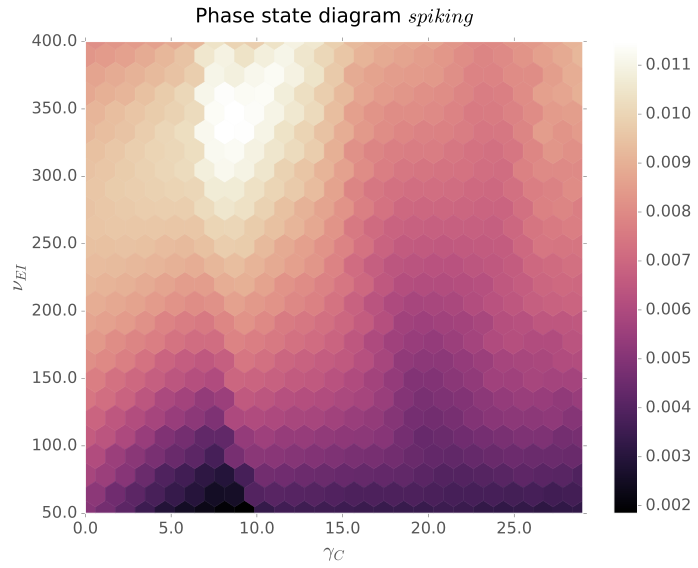

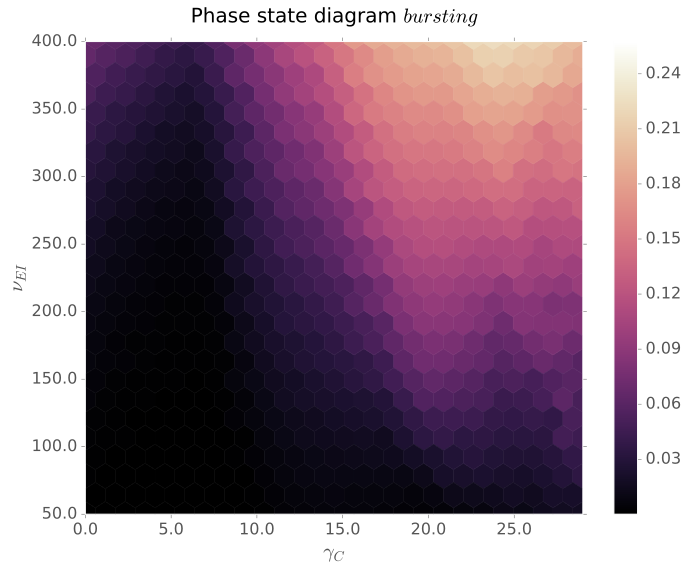

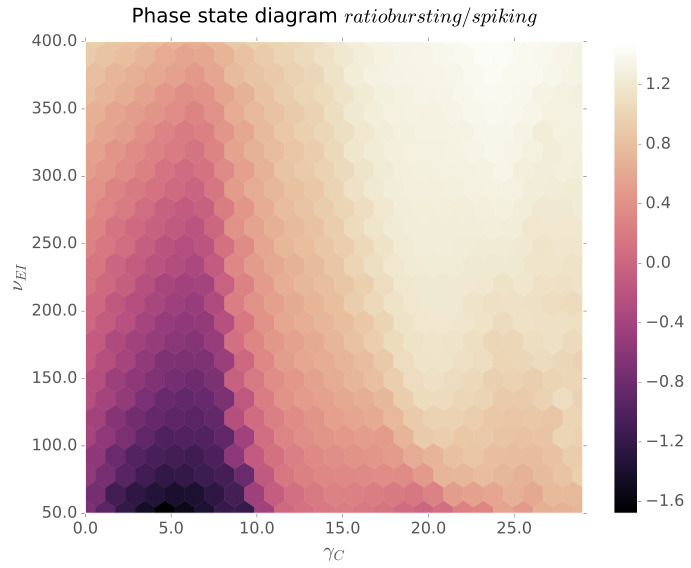

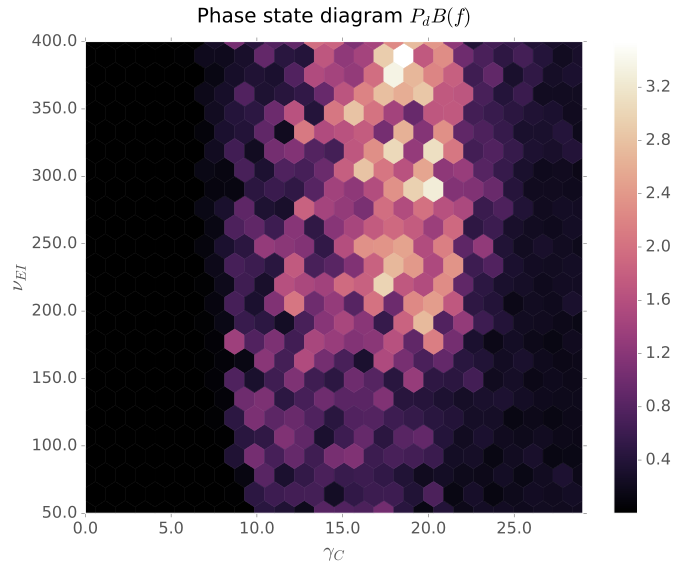

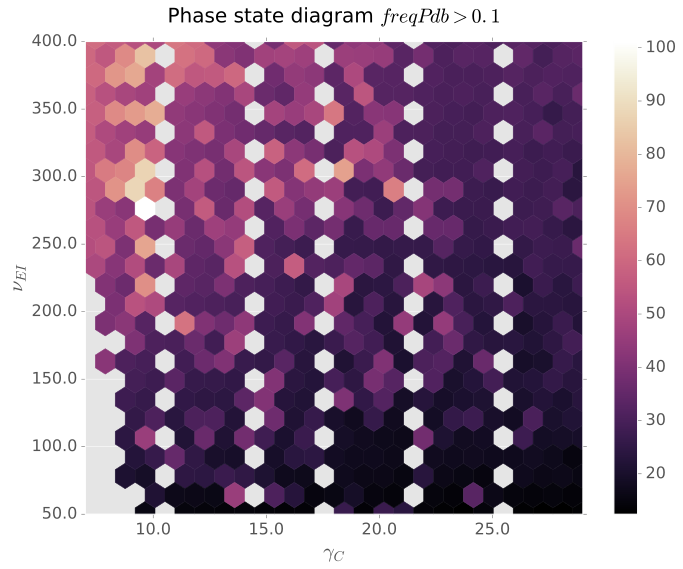

In [31]:
c=0
figsize = (10,8)
gridsize = 25

###################################
# spiking
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $spiking$'
filename = "global_gap_junctions_c%d_spiking.pdf" %c
column = 'non-burst'
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plotDiagram(fig, ax, dataframe, title, column, filename, gridsize= gridsize)

###################################
# bursting
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $bursting$'
filename = "global_gap_junctions_c%d_bursting.pdf" %c
column = 'burst'
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plotDiagram(fig, ax, dataframe, title, column, filename, gridsize= gridsize)

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram $ratio bursting/spiking$'
filename = "global_gap_junctions_c%d_ratio.pdf"
column = 'ratio'
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plotDiagram(fig, ax, dataframe, title, column, filename, gridsize=gridsize)

# ###################################
# # corI
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $corI$')
# filename = "global_gap_junctions_c%d_corI.pdf" %c
# column = 'corI'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

###################################
# power
###################################
dataframe = df[(df['freq']<1000)]
ttl = r'Phase state diagram $P_dB(f)$'
filename = "global_gap_junctions_c%d_power.pdf" %c
column = 'power'
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plotDiagram(fig, ax, dataframe, ttl, column, filename, front=False, gridsize=gridsize)

###################################
# power freq
###################################
dataframe = df[(df['freq']<500) & (df['power']>0.1)]
title = r'Phase state diagram $freq  Pdb>0.1$'
filename = "global_gap_junctions_c%d_power_freq.pdf" %c
column = 'freq'
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plotDiagram(fig, ax, dataframe, title, column, filename, front=False, gridsize=gridsize)

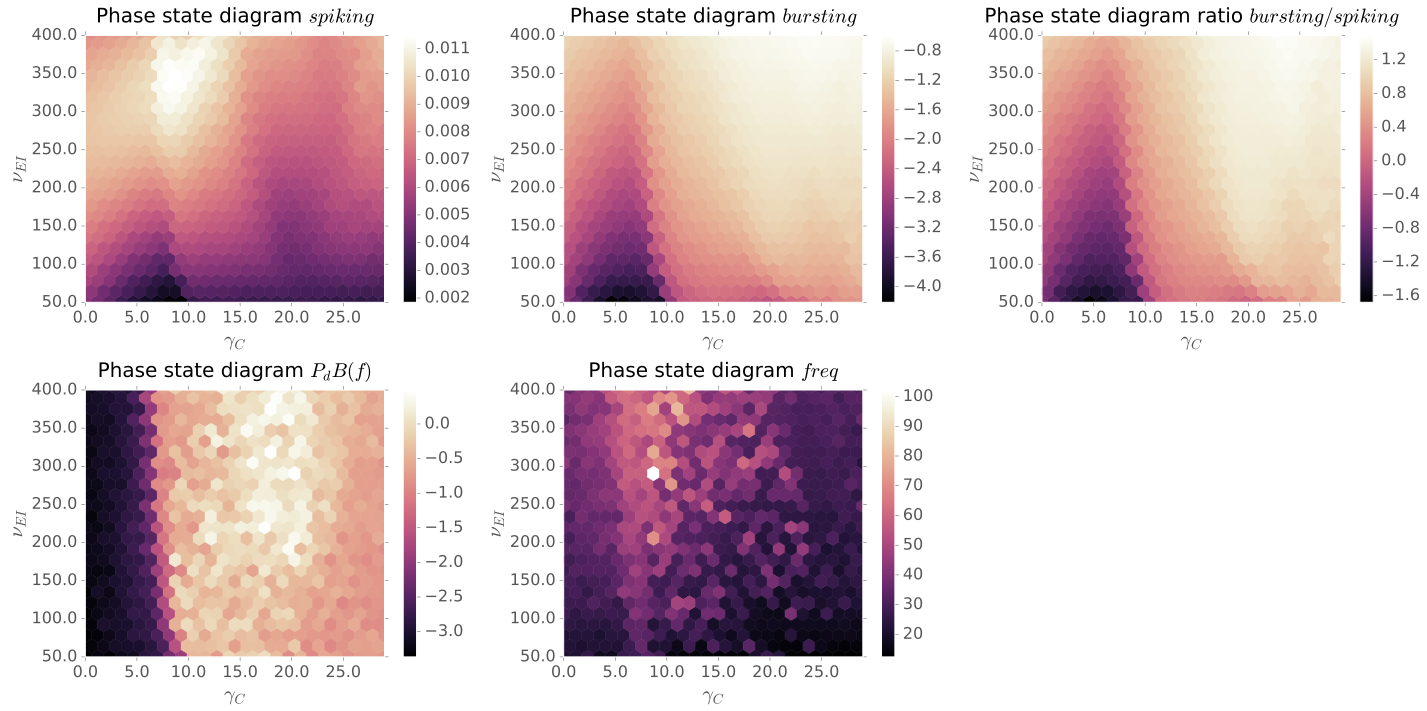

In [15]:
c=0
figsize = (20,10)
fig = plt.figure(figsize=figsize)
gridsize = 25
###################################
# spiking
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $spiking$'
filename = "global_gap_junctions_c%d_spiking.pdf" %c
column = 'non-burst'
ax = fig.add_subplot(231)
plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize = gridsize )

###################################
# bursting
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $bursting$'
filename = "global_gap_junctions_c%d_bursting.pdf" %c
dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
column = 'logburst'
ax = fig.add_subplot(232)
plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize = gridsize )

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_c%d_ratio.pdf"
column = 'ratio'
ax = fig.add_subplot(233)
plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize = gridsize )

# ###################################
# # corI
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $corI$')
# filename = "global_gap_junctions_c%d_corI.pdf" %c
# column = 'corI'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

###################################
# power
###################################
dataframe = df[(df['freq']<1000)]
dataframe['logpower']= (dataframe['power']).apply(np.log10)
ttl = r'Phase state diagram $P_dB(f)$'
filename = "global_gap_junctions_c%d_power.pdf" %c
column = 'logpower'
ax = fig.add_subplot(234)
plotDiagram(fig, ax, dataframe, ttl, column, filename, save=None, front=False, gridsize = gridsize )

###################################
# power freq
###################################
dataframe = df[(df['freq']<500)]
title = r'Phase state diagram $freq$'
filename = "global_gap_junctions_c%d_power_freq.pdf" %c
column = 'freq'
ax = fig.add_subplot(235)
plotDiagram(fig, ax, dataframe, title, column, filename, save=None,  front=False, gridsize = gridsize )
plt.tight_layout()
plt.savefig(DIRECTORY + 'all-diagrams.pdf')
plt.savefig(DIRECTORY + 'all-diagrams')

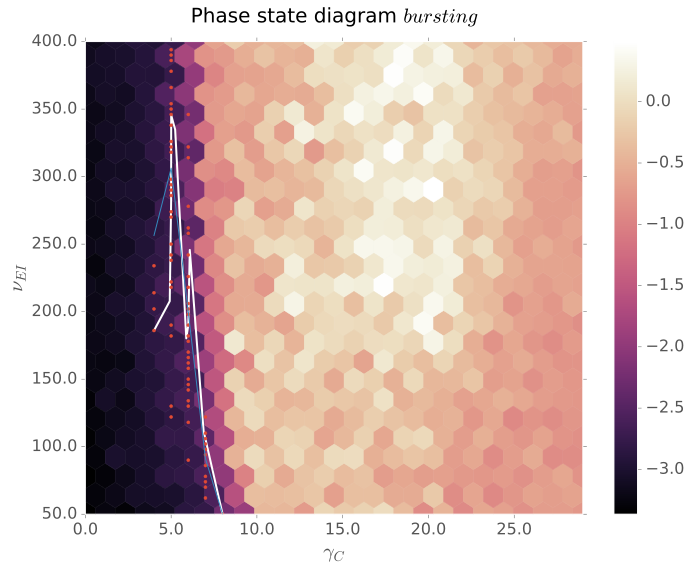

In [40]:
###################################
# bursting
###################################
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

dataframe = df[(df['freq']<1000)]
dataframe['logpower']= (dataframe['power']).apply(np.log10)
title = r'Phase state diagram $bursting$'
filename = "global_gap_junctions_bursting.pdf" 
column = 'logpower'

plotDiagram(fig, ax, dataframe, title, column, filename, gridsize = gridsize)

df_sliced = dataframe[(dataframe['logpower']>-2.7) & (dataframe['logpower']<-2.4)]
contour = df_sliced[['gammaC','nuEI']].get_values()
yvals, xvals = bezier_curve(contour, nTimes=10)
frontier = np.array([xvals,yvals])

plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
plt.plot(contour[:,0], contour[:,1], '.')
x = contour[:,0]
y = contour[:,1]
x, y = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y) if xVal==a])) for xVal in set(x)))
plt.plot(x,y)
# plt.savefig(DIRECTORY + 'bursting_phase_plan.pdf')

In [ ]:
def overunder(df, frontier, rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    if rule in [0,1,5,3]:
        col = np.arange(2,4,0.05) #ratio for active rule
    else:
        col = np.arange(450,570,3) #ratio for passive rule
    row = np.arange(0,200,1) #nu
    Z = np.zeros(shape=(len(row),len(col)))
    for i,ratio in enumerate(col):
        for j, nuEI in enumerate(row):
            f= fixpoint(df, nuEI, ratio, rule)
            border = frontgamma(nuEI, frontier)
            Z[len(row)-1-j,i] = abs(f-border)*((f<border) and (f>0.15) and (nuEI>48))*1.0
    return Z

Z = Parallel(n_jobs=num_cores)(delayed(overunder)(dataframe, frontier,i) for i in range(6))

Z1 = Z[1] # hardbound spiking
Z2 = Z[0] # softbound spiking
Z3 = Z[3] # spiking non bursting 
Z4 = Z[4] # hardbound passive rule
Z5 = Z[5] # hardbound spiking non bursting 
Zpassive = Z[2] # softbound passive rule (all non bursting neurons are potentiated)

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/

##$ratio = \frac{LTD}{LTP}$

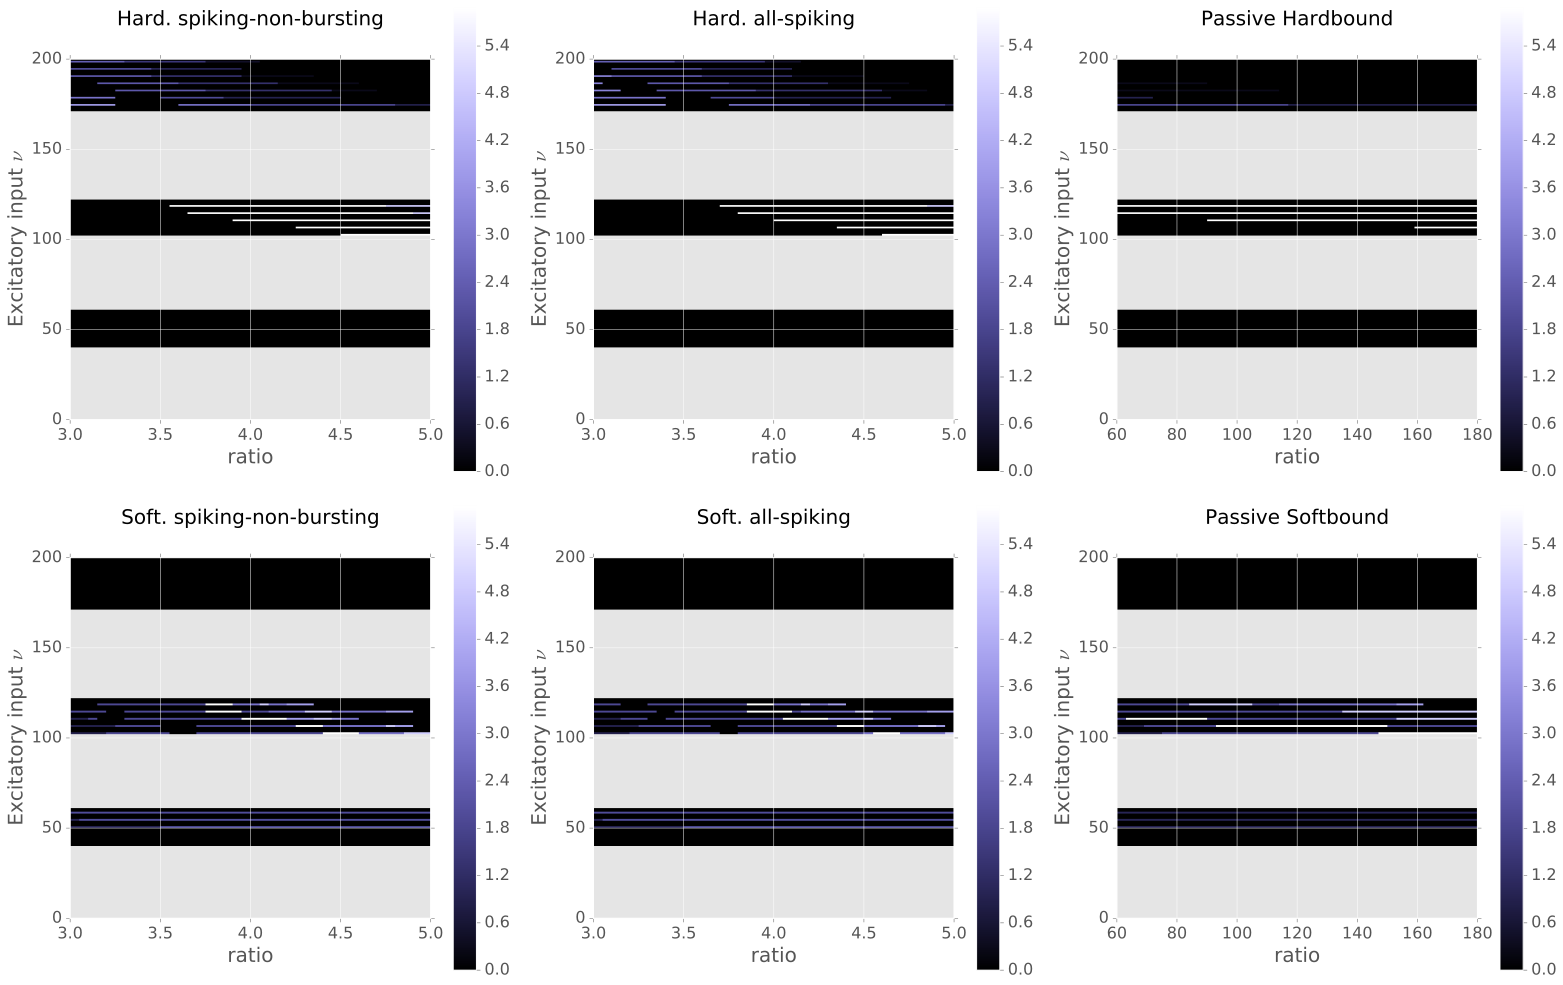

In [ ]:
'''
Plot the \dot(gamma) as function of \gamma for hardbound
'''

cx_blue = cubehelix.cmap(reverse=False, start=3., rot=0)

fig = plt.figure(figsize=(22,14))

extent1 = [3,5.0,0,200]
extent2 = [60,180,0,200]

ax6 = fig.add_subplot(232)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Hard. all-spiking', y=1.08)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z1, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=2/200)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(231)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Hard. spiking-non-bursting', y=1.08)
image = ax5.imshow(Z5, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=2/200)#, cmap =cx4)# drawing the function
plt.colorbar(image)

# plt.savefig(DIRECTORY + 'soft_vs_hard_all.pdf')

ax7 = fig.add_subplot(233)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Hardbound', y=1.08)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Z4, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=120/200)#, cmap =cx4)# drawing the function
plt.colorbar(image)
# plt.tight_layout()
# plt.savefig(DIRECTORY + 'hardbound.pdf')

'''
plot the \dot(gamma) as function of \gamma for hardbound and softbound eLTP and for two excitatory input levels
'''

ax6 = fig.add_subplot(235)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Soft. all-spiking', y=1.08)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z2, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=2/200)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(234)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Soft. spiking-non-bursting', y=1.08)
image = ax5.imshow(Z3, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=2/200)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax7 = fig.add_subplot(236)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Softbound', y=1.08)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Zpassive, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=120/200)#, cmap =cx4)# drawing the function
plt.colorbar(image)
plt.tight_layout()
plt.savefig(DIRECTORY + 'soft_hard_horizontal.pdf')